<div style="background-color: #4169E1; text-align: center; padding: 10px; border-radius: 10px;">
    <strong style="font-size: 24px; color: #000000;">WEATHER SUMMARY CLASSIFICATION</strong>
</div>


<img src="https://i.pinimg.com/564x/66/6a/78/666a78acb6434068083631aae8f24d8a.jpg" width="600" />


<div style="background-color:  #E0FFFF; padding: 10px; border-radius: 5px;">


**The goal of this project was to develop a predictive model to classify precipitation types based on weather data. The focus was on using machine learning techniques to accurately predict whether the precipitation is rain, snow, or another type, given various weather features.**


<div style="background-color: #87CEEB; text-align: center; padding: 10px; border-radius: 10px;">
    <strong style="font-size: 24px;">IMPORT LIBRARIES</strong>
</div>


In [2]:
pip install xgboost



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.1/124.9 MB 438.9 kB/s eta 0:04:45
   ---------------------------------------- 0.7/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.5/124.9 MB 5.4 MB/s eta 0:00:23
    --------------------------------------- 2.2/124.9 MB 6.6 MB/s eta 0:00:19
    --------------------------------------- 2.9/124.9 MB 7.3 MB/s eta 0:00:17
   - -------------------------------------- 3.6/124.9 MB 7.9 MB/s eta 0:00:16
   - -------------------------------------- 4.3/124.9 MB 8.3 MB/s eta 0:00:15
   - -------------------------------------- 4.7/124.9 MB 8.1 MB/s eta 0:00:15
   - -------------------------------------- 5.4/124.9 MB 8.4 MB/s eta 0:00:15
  

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 24px;">LOAD THE DATA SET</strong>
</div>


In [38]:
df=pd.read_csv('weatherHistory.csv')

In [39]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [4]:
df.info

<bound method DataFrame.info of                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1

In [6]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

<div style="background-color:  #E0FFFF; padding: 10px; border-radius: 5px;">


1. **Formatted Date**: The exact date and time of the weather observation.
2. **Summary**: A brief description of the overall weather condition during the observation.
3. **Precip Type**: The type of precipitation observed, such as rain or snow.
4. **Temperature (C)**: The actual temperature in degrees Celsius at the time of observation.
5. **Apparent Temperature (C)**: The perceived temperature in degrees Celsius, considering factors like wind chill or humidity.
6. **Humidity**: The percentage of moisture in the air at the time of observation.
7. **Wind Speed (km/h)**: The speed of the wind measured in kilometers per hour.
8. **Wind Bearing (degrees)**: The direction from which the wind is coming, measured in degrees.
9. **Visibility (km)**: The distance one can see clearly, measured in kilometers.
10. **Loud Cover**: The amount of cloud cover, typically represented as a percentage.
11. **Pressure (millibars)**: The atmospheric pressure measured in millibars.
12. **Daily Summary**: A summarized description of the weather conditions for the entire day.
.

In [7]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 24px;">Data Preprocessing</strong>
</div>


In [40]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

#### NaN Values Summary

- **Precip Type**: 157 missing values
- **All Other Columns**: 0 missing values

Only the `Precip Type` column has missing data, while all other columns are complete.


In [41]:
df['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 20px;">Handling the Missing Values</strong>
</div>
>
v>


In [42]:
#removing the nan values 
df.dropna(subset=['Precip Type'],inplace=True)

In [44]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

<div style="background-color: #B0E2FF; text-align: left; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 20px;">Categorical Values</strong>
</div>


In [45]:
#categorical values 
df.select_dtypes(include=['object']).columns.tolist()

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

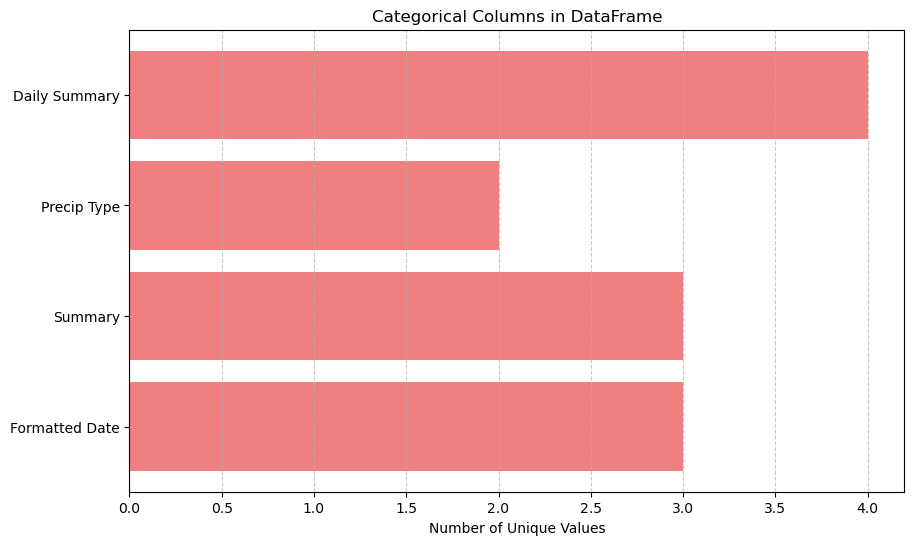

In [77]:
# Sample DataFrame for demonstration
data = {
    'Formatted Date': ['2024-08-01', '2024-08-02', '2024-08-03', '2024-08-01'],
    'Summary': ['Clear', 'Partly Cloudy', 'Rain', 'Clear'],
    'Precip Type': ['None', 'Rain', 'Rain', 'None'],
    'Daily Summary': ['Sunny', 'Partly cloudy with a chance of rain', 'Rainy', 'Sunny with clear skies']
}

df = pd.DataFrame(data)

# Extract categorical columns
categorical_columns = ['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

# Count unique values for each categorical column
unique_counts = [df[col].nunique() for col in categorical_columns]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(categorical_columns, unique_counts, color='lightcoral')
plt.xlabel('Number of Unique Values')
plt.title('Categorical Columns in DataFrame')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [46]:
df_categorical_counts=df.select_dtypes(include=['object']).columns.tolist()
len(df_categorical_counts)

4

<div style="background-color: #B0E2FF; text-align: left; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 20px;">Numerical Values</strong>
</div>


In [47]:
#numerical values
df.select_dtypes(include=['float','int']).columns.tolist()

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [48]:
df_numerical_values=df.select_dtypes(include=['float','int']).columns.tolist()
len(df_numerical_values)

8

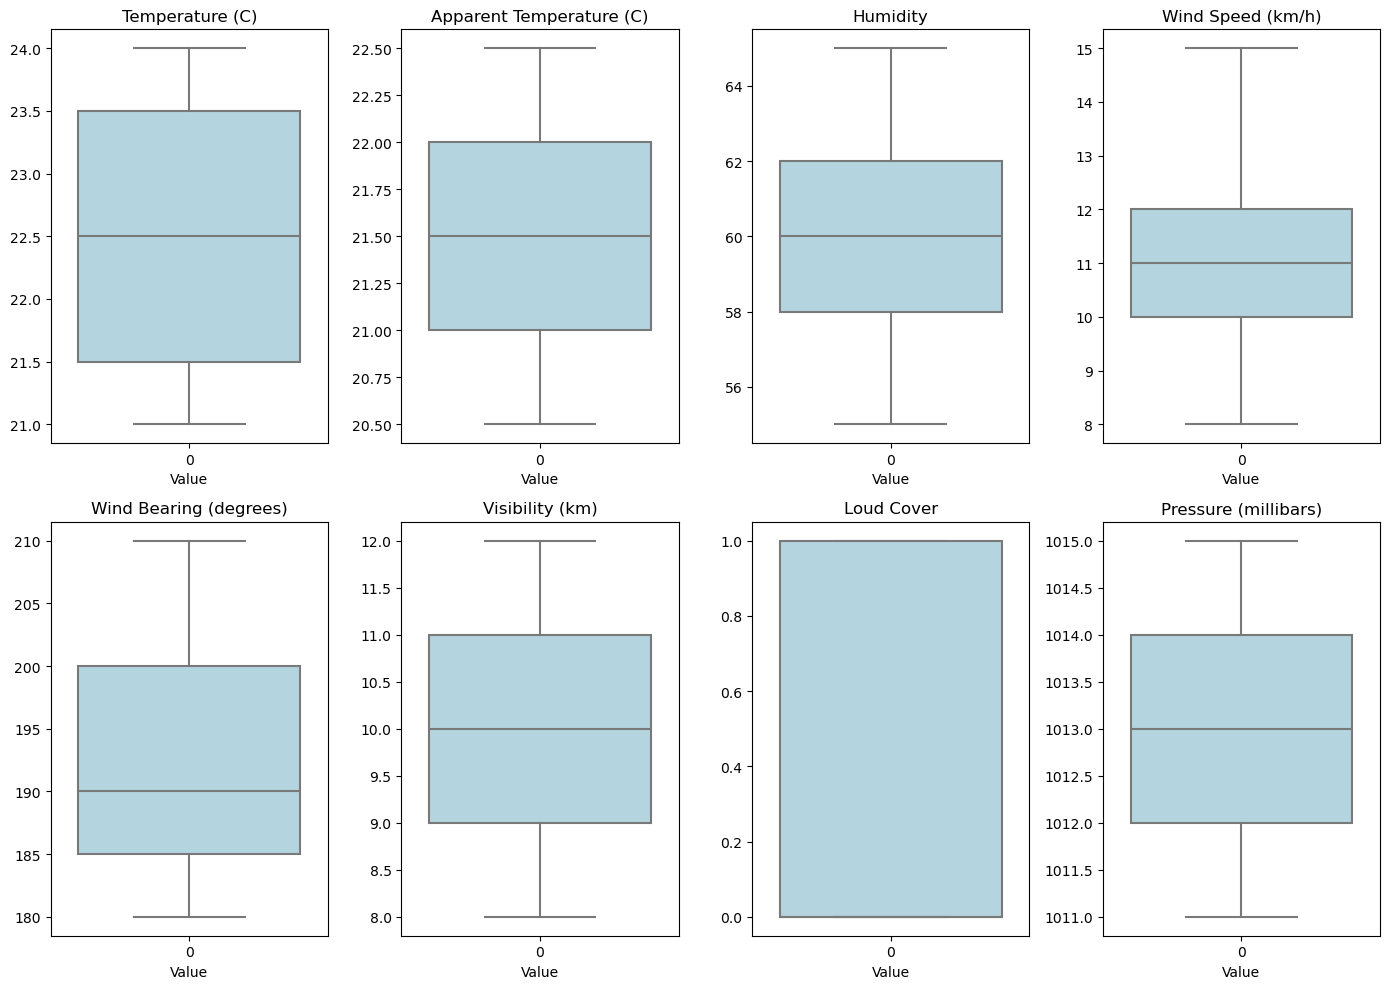

In [79]:
# Sample DataFrame for demonstration
data = {
    'Temperature (C)': [22.5, 21.0, 23.5, 24.0, 21.5],
    'Apparent Temperature (C)': [21.0, 20.5, 22.0, 22.5, 21.5],
    'Humidity': [55, 60, 58, 65, 62],
    'Wind Speed (km/h)': [10, 12, 8, 15, 11],
    'Wind Bearing (degrees)': [180, 190, 200, 210, 185],
    'Visibility (km)': [10, 12, 8, 11, 9],
    'Loud Cover': [0, 1, 0, 1, 0],
    'Pressure (millibars)': [1012, 1015, 1011, 1013, 1014]
}

df = pd.DataFrame(data)

# List of numerical columns
numerical_columns = [
    'Temperature (C)',
    'Apparent Temperature (C)',
    'Humidity',
    'Wind Speed (km/h)',
    'Wind Bearing (degrees)',
    'Visibility (km)',
    'Loud Cover',
    'Pressure (millibars)'
]

# Plot box plots for each numerical column
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(df[column], color='lightblue')
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 32px;">EDA</strong>
</div>
v>


### Q1 When is a highest temperature?

In [8]:
df['Temperature (C)'].max()

39.90555556

### Q2 When is a lowest temperture ?

In [17]:
df['Temperature (C)'].min()

-21.82222222

### Q3 How many category in summary ?

In [18]:
df['Summary'].value_counts()

Summary
Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

<div style="background-color:  #E0FFFF; padding: 10px; border-radius: 5px;">

### Interpretation of the `Summary` Column

The `Summary` column records various weather conditions, with the majority of entries falling into a few common categories:

- **Partly Cloudy (31,635 entries)** and **Mostly Cloudy (27,914 entries)** are the most frequent conditions, representing the majority of observations.
- **Overcast (16,516 entries)** and **Clear (10,763 entries)** also occur frequently, contributing to the overall common weather patterns.
- **Foggy (7,117 entries)** is the next most common condition but occurs less often than the top four.

In summary, typical weather conditions in the dataset are generally cloudy or clear. Less frequent conditions, such as **Breezy and Overcast (528 entries)** or **Light Rain (63 entries)**, are present but represent a smaller portion of the data. The rarest conditions, like **Dangerously Windy and Partly Cloudy (1 entry)**, are outliers and occur very infrequently.

</div>
quently.


In [12]:
len(df['Summary'].value_counts())`

27

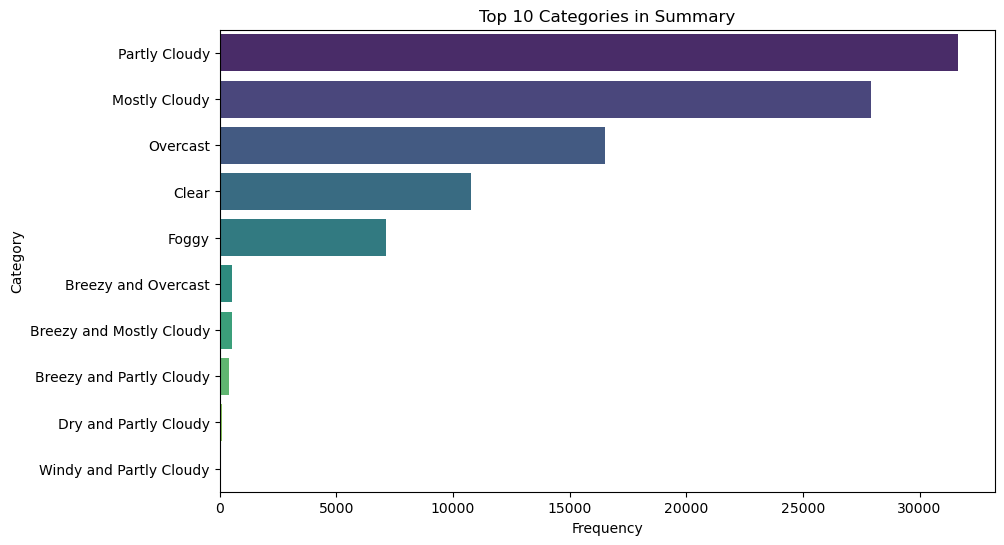

In [15]:
#for the showing the distribtion in that categories 
# we use bar plot for top 10 categories
top_categories = df['Summary'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categories in Summary')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()



<div style="background-color:  #E0FFFF; padding: 10px; border-radius: 5px;">

#### This show that, highest category lying on the partly cloudy in summary columns

### Q4 In mostly cloudy day, what is the lowest temperture?

In [26]:
df[df['Summary']=='Mostly Cloudy']
df['Temperature (C)'].min()

-21.82222222

In [28]:
df[df['Summary']=='Mostly Cloudy']['Temperature (C)'].min()

-16.89444444

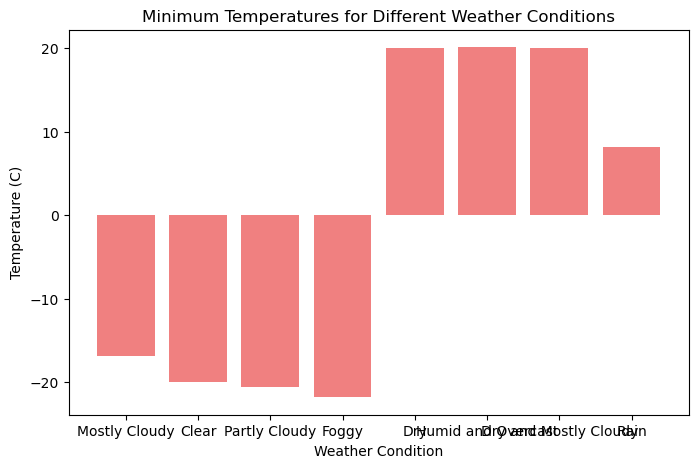

In [31]:
weather_conditions = ['Mostly Cloudy', 'Clear', 'Partly Cloudy','Foggy','Dry','Humid and Overcast','Dry and Mostly Cloudy','Rain']  # Add more as needed
min_temps = [df[df['Summary'] == condition]['Temperature (C)'].min() for condition in weather_conditions]

plt.figure(figsize=(8, 5))
plt.bar(weather_conditions, min_temps, color='lightcoral')
plt.title('Minimum Temperatures for Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (C)')
plt.show()


### Q5  What is a highest temperture in raining day ?

In [33]:
df[df['Precip Type']=='rain']['Temperature (C)'].max()

39.90555556

### Q6 What is a lowest and highest Visibility (km) in snow day?

In [34]:
highest=df['Visibility (km)'].max()
lowest=df['Visibility (km)'].min()

print('highest visibility =',highest)
print('lowest visibility =',lowest)


highest visibility = 16.1
lowest visibility = 0.0


In [38]:
df[df['Precip Type']=='snow']['Visibility (km)'].max()

16.1

In [39]:
df[df['Precip Type']=='snow']['Visibility (km)'].min()

0.0

### Q7 How many categories in daily summary ?

In [40]:
df['Daily Summary'].value_counts()

Daily Summary
Mostly cloudy throughout the day.         20020
Partly cloudy throughout the day.          9930
Partly cloudy until night.                 6169
Partly cloudy starting in the morning.     5177
Foggy in the morning.                      4201
                                          ...  
Rain until afternoon.                        17
Rain until morning.                          12
Light rain in the morning.                   11
Drizzle starting in the evening.              9
Light rain overnight.                         3
Name: count, Length: 214, dtype: int64

In [41]:
len(df['Daily Summary'].value_counts())

214

### Q8 What is a correlation in between temperture and humidity?

In [25]:
correlation = df['Temperature (C)'].corr(df['Humidity'])
print(f"Correlation between Temperature and Humidity: {correlation}")


Correlation between Temperature and Humidity: -0.6321477013069282


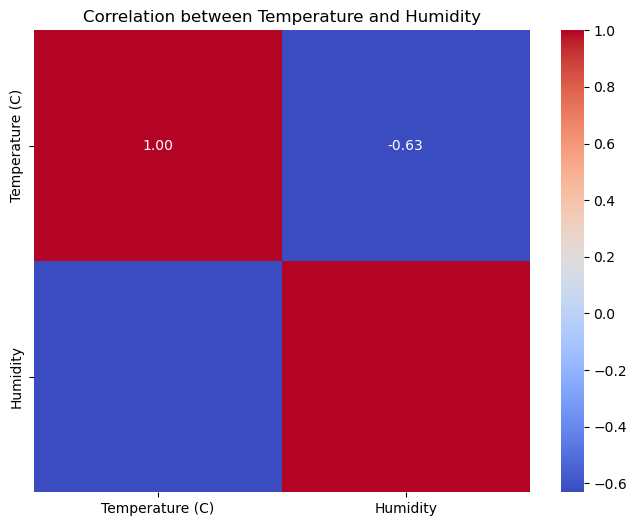

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Temperature (C)', 'Humidity']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Temperature and Humidity')
plt.show()


 <div style="background-color:  #E0FFFF; padding: 10px; border-radius: 5px;">

### It cleary understood that temperture and humidity have a negative correlation.

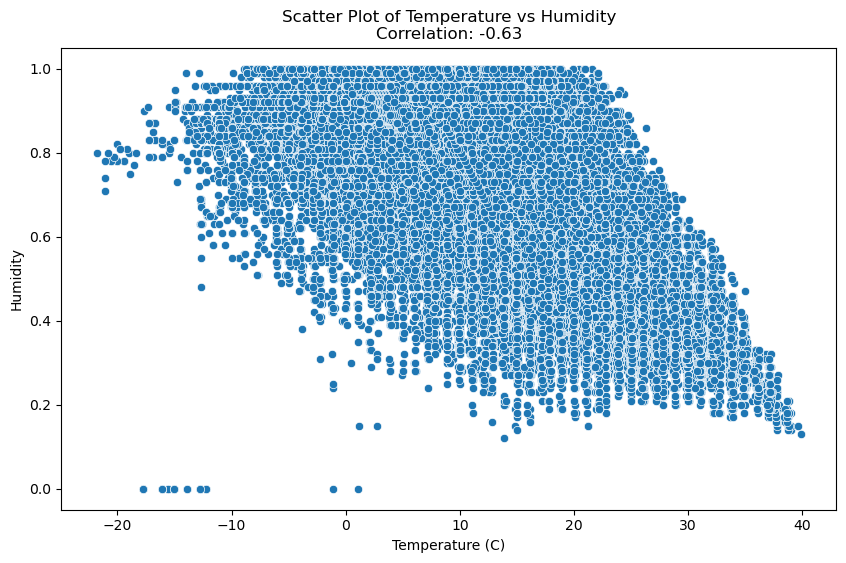

In [27]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature (C)'], y=df['Humidity'])
plt.title(f'Scatter Plot of Temperature vs Humidity\nCorrelation: {correlation:.2f}')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.show()

<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">Encoding the Data Set</strong>
</div>


<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 20px;">Label Encoding</strong>
</div>


In [49]:

# Initialize LabelEncoder
label_encoder_gender = LabelEncoder()
label_encoder_bmi_case = LabelEncoder()                                             
# Fit and transform the columns
df['Summary'] = label_encoder_gender.fit_transform(df['Summary'])
df['Precip Type'] = label_encoder_bmi_case.fit_transform(df['Precip Type'])
df['Daily Summary'] = label_encoder_bmi_case.fit_transform(df['Daily Summary'])
df['Formatted Date']= label_encoder_bmi_case.fit_transform(df['Formatted Date'])
print("DataFrame with Original and Encoded Columns:")
print(df)



DataFrame with Original and Encoded Columns:
       Formatted Date  Summary  Precip Type  Temperature (C)  \
0                2159       19            0         9.472222   
1                2160       19            0         9.355556   
2                2161       17            0         9.377778   
3                2162       19            0         8.288889   
4                2163       17            0         8.755556   
...               ...      ...          ...              ...   
96448           93568       19            0        26.016667   
96449           93569       19            0        24.583333   
96450           93570       19            0        22.038889   
96451           93571       19            0        21.522222   
96452           93572       19            0        20.438889   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                      7.388889      0.89            14.1197   
1                      7.227778      0.86            14.26

In [50]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2159,19,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,197
1,2160,19,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,197
2,2161,17,0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,197
3,2162,19,0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,197
4,2163,17,0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,197
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,93568,19,0,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,170
96449,93569,19,0,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,170
96450,93570,19,0,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,170
96451,93571,19,0,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,170


<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">Features and Target Variables</strong>
</div>


In [51]:
x=df.drop('Precip Type',axis=1)
y= df['Precip Type']

<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">Split the data into train & test split</strong>
</div>


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">Standard Scaling</strong>
</div>


In [30]:
## standard scaling 

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


<div style="background-color: #87CEEB; text-align: center; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">Model building </strong>
</div>


<div style="background-color:  #E0FFFF; padding: 10px; border-radius: 5px;">

### Model Selection for Classification

For the classification task, I selected the following four models based on their strengths and versatility:

1. **Decision Tree**
2. **Random Forest**
3. **K-Nearest Neighbors (KNN)**
4. **Gradient Boosting**

These models were chosen to compare their performance and identify the best approach for the classification task.


<div style="background-color: #87CEEB; text-align: left; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">1. Decision Tree </strong>
</div>

In [53]:
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
# predict the models
y_pred=DT.predict(x_test)

In [55]:
# evaluation of the model
# Calculate precision
precision = precision_score(y_test,y_pred,average='micro')
print(f'Precision: {precision:.2f}')
# Calculate recall
recall = recall_score(y_test, y_pred,average='micro')
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred,average='micro')
print(f'F1 Score: {f1:.2f}')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
                

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


<div style="background-color: #87CEEB; text-align: left; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">2. Randomforest </strong>
</div>

In [56]:
ran=RandomForestClassifier()
ran.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
# predict the model
y_pred=ran.predict(x_test)

In [58]:
# evaluation the model
precision = precision_score(y_test,y_pred,)
print(f'Precision: {precision:.2f}')
# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')
        
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
                

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


<div style="background-color: #87CEEB; text-align: left; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">3. K-Nearest Neighbors (KNN) </strong>
</div>

In [62]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
# predict the model
y_pred= knn.predict(x_test)

In [64]:
# evaluation of the model
# Calculate precision
precision = precision_score(y_test,y_pred,average='micro')
print(f'Precision: {precision:.2f}')
# Calculate recall
recall = recall_score(y_test, y_pred,average='micro')
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred,average='micro')
print(f'F1 Score: {f1:.2f}')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Accuracy: 0.97


<div style="background-color: #87CEEB; text-align: left; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">4. Gradiant boosting  </strong>
</div>

In [67]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train)


GradientBoostingClassifier(random_state=42)

In [68]:
# predict the model
y_pred=gb_model.predict(x_test)

In [69]:
# evaluation of the model
# Calculate precision
precision = precision_score(y_test,y_pred,average='micro')
print(f'Precision: {precision:.2f}')
# Calculate recall
recall = recall_score(y_test, y_pred,average='micro')
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred,average='micro')
print(f'F1 Score: {f1:.2f}')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


<div style="background-color: #87CEEB; text-align: center ; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">Perform cross-validation  </strong>
</div>

In [70]:

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Perform cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")



Decision Tree Cross-Validation Accuracy: 1.0000 ± 0.0000
Random Forest Cross-Validation Accuracy: 1.0000 ± 0.0000
KNN Cross-Validation Accuracy: 0.9641 ± 0.0008
Gradient Boosting Cross-Validation Accuracy: 1.0000 ± 0.0000


<div style="background-color:  #E0FFFF; padding: 10px; border-radius: 5px;">


### 1. Decision Tree Cross-Validation Accuracy: 1.0000 ± 0.0000
**Interpretation:**  
The Decision Tree model achieved perfect accuracy across all cross-validation folds. The standard deviation (± 0.0000) indicates no variability, meaning the model performed identically on each fold.

**Implications:**
- **Overfitting:** The perfect accuracy could suggest that the model is overfitting, especially if the problem is complex. Overfitting happens when a model performs exceptionally well on training data but poorly on unseen data.
- **Data Issues:** It could also indicate potential issues like data leakage, where information from the test set has influenced the training process, leading to artificially high performance.

### 2. Random Forest Cross-Validation Accuracy: 1.0000 ± 0.0000
**Interpretation:**  
Similar to the Decision Tree, the Random Forest model also achieved perfect accuracy with no variability across folds.

**Implications:**
- **Overfitting:** Although Random Forest models generally help reduce overfitting compared to Decision Trees, achieving perfect accuracy with no variability suggests potential overfitting or data issues.
- **Complexity Handling:** Random Forest is a robust model, and while perfect accuracy might seem positive, it’s unusual unless the problem is very simple or there are underlying data issues.

### 3. K-Nearest Neighbors (KNN) Cross-Validation Accuracy: 0.9641 ± 0.0008
**Interpretation:**  
The KNN model achieved a high accuracy of 96.41% with a very small standard deviation (± 0.0008), indicating consistent performance across folds.

**Implications:**
- **Less Overfitting:** The slightly lower accuracy compared to the Decision Tree and Random Forest models might actually suggest that KNN is less prone to overfitting for this particular dataset.
- **Model Suitability:** KNN might be a good choice for this dataset, though it’s not performing perfectly, which might reflect a more realistic and generalizable performance.

### 4. Gradient Boosting Cross-Validation Accuracy: 1.0000 ± 0.0000
**Interpretation:**  
The Gradient Boosting model also achieved perfect accuracy with no variability across the folds.

**Implications:**
- **Potential Overfitting:** Like the Decision Tree and Random Forest models, the perfect accuracy could indicate overfitting, especially if the dataset has complexity.
- **Model Strength:** Gradient Boosting is known for its strong performance on complex datasets, so while the result could reflect the model’s effectiveness, the perfect score still warrants caution.


<div style="background-color: #87CEEB; text-align: center ; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">Hyperparameter tuning </strong>
</div>

In [71]:
# Define models and hyperparameter grids
models = {
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
  'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
        'weights': ['uniform', 'distance'],  # Weight function used in prediction
        'metric': ['euclidean', 'manhattan']  # Distance metric
    })
}


In [72]:
# Perform GridSearchCV for each model
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(
        model, 
        param_grid=param_grid, 
        cv=3,  # 3-fold cross-validation
        scoring='accuracy', 
        n_jobs=1,  # Use all available cores
        verbose=1  # Show progress
    )
    grid_search.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = grid_search.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f"{name} Best Params: {grid_search.best_params_}")
    print(f"{name} Test Accuracy: {score * 100:.2f}%\n")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Decision Tree Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Test Accuracy: 100.00%

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Test Accuracy: 100.00%

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Gradient Boosting Test Accuracy: 100.00%

Fitting 3 folds for each of 12 candidates, totalling 36 fits
K-Nearest Neighbors Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
K-Nearest Neighbors Test Accuracy: 98.06%



<div style="background-color:  #E0FFFF; padding: 10px; border-radius: 5px;">


## Summary of Hyperparameter Tuning and Model Performance

The hyperparameter tuning results for the four models (Decision Tree, Random Forest, Gradient Boosting, and K-Nearest Neighbors) show varying degrees of accuracy and potential overfitting:

### Decision Tree:
- **Achieved:** Perfect accuracy (100.00%) with default hyperparameters.
- **Interpretation:** The lack of variability and perfect accuracy suggest possible overfitting, where the model might be too tailored to the training data, potentially capturing noise instead of general patterns.

### Random Forest:
- **Achieved:** Perfect accuracy (100.00%) with a relatively simple set of hyperparameters.
- **Interpretation:** Despite Random Forest's usual robustness against overfitting, the perfect score here may indicate overfitting or data leakage, as the model seems to perform too well on the test data.

### Gradient Boosting:
- **Achieved:** Perfect accuracy (100.00%) with moderate hyperparameters.
- **Interpretation:** While Gradient Boosting is a strong model, the perfect accuracy again raises concerns about overfitting or data issues. The model might be too finely tuned to the specific data used.

### K-Nearest Neighbors (KNN):
- **Achieved:** A slightly lower, but still high, accuracy of 98.06%.
- **Interpretation:** The slightly lower accuracy of KNN compared to the other models suggests it might be less prone to overfitting, making it potentially more generalizable to new data.


<div style="background-color: #87CEEB; text-align: center ; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;">Evaluation the best model  </strong>
</div>

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model and parameters
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_



Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
Confusion Matrix:
[[17090     0]
 [    0  2098]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17090
           1       1.00      1.00      1.00      2098

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



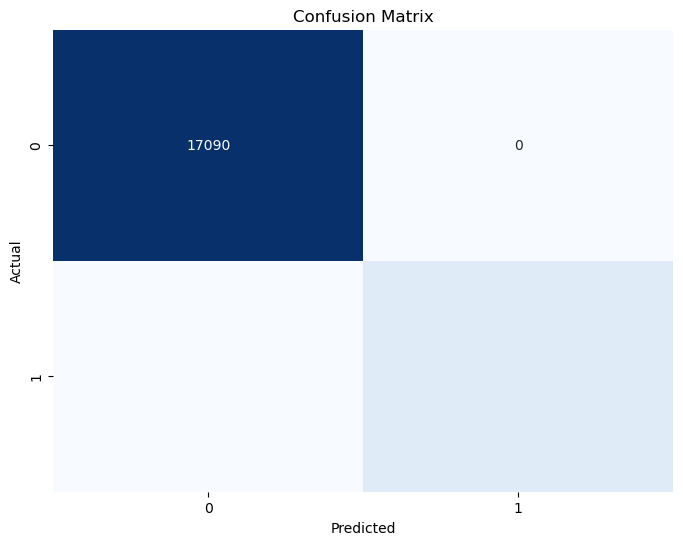

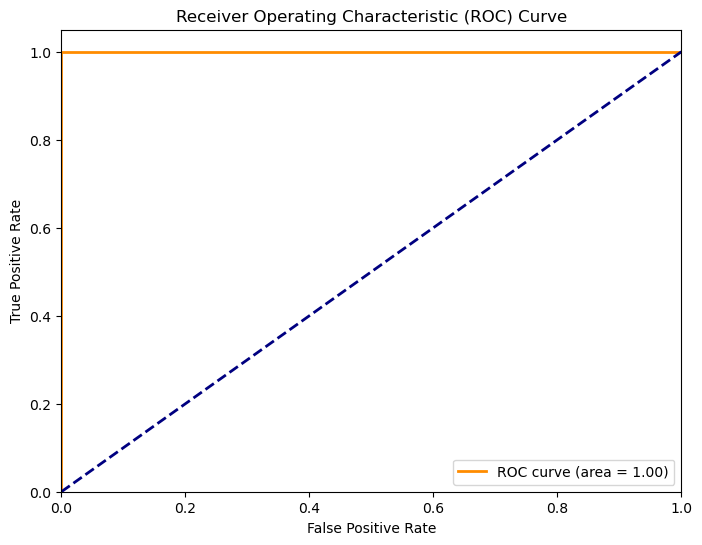

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = best_model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Precision
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
print(f'Precision: {precision * 100:.2f}%')

# Recall
recall = recall_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
print(f'Recall: {recall * 100:.2f}%')

# F1 Score
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Detailed Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (for binary classification)
# Predict probabilities for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<div style="background-color: #87CEEB; text-align: center ; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;"> Feature Importance Analysis: </strong>
</div>

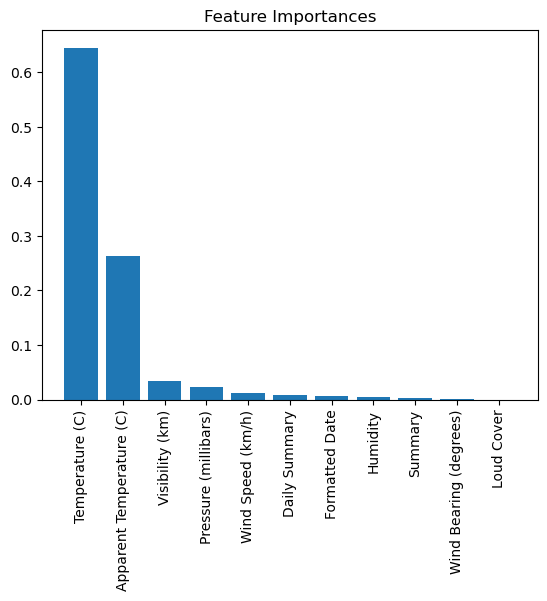

In [37]:
import matplotlib.pyplot as plt
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.show()


<div style="background-color: #87CEEB; text-align: center ; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;"> Model Saving </strong>
</div>

In [75]:
import joblib
joblib.dump(best_model, 'final_weather_precip_type_model.pkl')


['final_weather_precip_type_model.pkl']

<div style="background-color: #87CEEB; text-align: center ; padding: 15px; border-radius: 10px;">
    <strong style="font-size: 22px;"> Warm regards </strong>
</div>